In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime
import seaborn as sns

# importing csv files.
crimes_19 = pd.read_csv('input_data/Chicago_Crimes_2019.csv')
crimes_20 = pd.read_csv('input_data/Chicago_Crimes_2020.csv')
crimes_21 = pd.read_csv('input_data/Chicago_Crimes_2021.csv')

# merging crimes data for the last 3 years into a signle dataframe
crimes_data = pd.merge((pd.merge(crimes_19,crimes_20, how="outer")),crimes_21,how="outer")

print(len(crimes_data))

679438


In [2]:
# converting Date column in dataframe to date format and adding columns for month, year, day, time
crimes_data["Date"] = pd.to_datetime(crimes_data['Date'])
crimes_data["Day"] = crimes_data['Date'].dt.day_name()
crimes_data["Month Day"] =crimes_data['Date'].dt.day
crimes_data["Month"] = crimes_data['Date'].dt.month_name()
crimes_data["Year"] = crimes_data['Date'].dt.year
crimes_data["Time"] =crimes_data['Date'].dt.time
crimes_data["AM_PM"] = pd.to_datetime(crimes_data['Date']).dt.strftime("%p")

crimes_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Day,Month Day,Month,Year,Time,AM_PM
0,11715789,JC297664,2019-01-01 14:00:00,021XX W BELMONT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,6/9/2019 16:05,NaN,NaN,NaN,Tuesday,1,January,2019,14:00:00,PM
1,11554737,JC102447,2019-01-01 20:00:00,077XX S ABERDEEN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,True,...,3/30/2020 15:48,41.753720,-87.651399,"(41.753720143, -87.65139884)",Tuesday,1,January,2019,20:00:00,PM
2,11552577,JC100040,2019-01-01 00:31:00,032XX W LAWRENCE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,1/10/2019 15:16,41.968444,-87.709342,"(41.968444497, -87.709341738)",Tuesday,1,January,2019,00:31:00,AM
3,11552587,JC100034,2019-01-01 00:05:00,006XX E 83RD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1/10/2019 15:16,41.742968,-87.608410,"(41.742968219, -87.6084099)",Tuesday,1,January,2019,00:05:00,AM
4,11552596,JC100045,2019-01-01 00:03:00,001XX W HURON ST,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,HOTEL/MOTEL,False,False,...,1/10/2019 15:16,41.894822,-87.632134,"(41.894821547, -87.632133928)",Tuesday,1,January,2019,00:03:00,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679433,12352092,JE172277,2021-03-18 10:45:00,006XX W OHARE ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,GOVERNMENT BUILDING / PROPERTY,False,False,...,4/13/2022 16:50,NaN,NaN,NaN,Thursday,18,March,2021,10:45:00,AM
679434,12357360,JE153789,2021-02-27 09:07:00,042XX W MADISON ST,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),VEHICLE NON-COMMERCIAL,False,False,...,4/13/2022 16:50,NaN,NaN,NaN,Saturday,27,February,2021,09:07:00,AM
679435,12669473,JF206525,2021-03-30 00:00:00,078XX S MUSKEGON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,4/13/2022 16:50,NaN,NaN,NaN,Tuesday,30,March,2021,00:00:00,AM
679436,12350271,JE165805,2021-03-11 09:16:00,036XX W LEXINGTON ST,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),RESIDENCE - YARD (FRONT / BACK),False,False,...,4/13/2022 16:50,NaN,NaN,NaN,Thursday,11,March,2021,09:16:00,AM


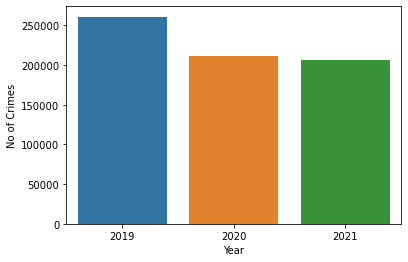

In [3]:
#total of crimes per year 
sns.countplot(x='Year',data=crimes_data)
plt.ylabel('No of Crimes')
plt.show()

In [4]:
#total of crimes per district name from 2019 to 2021
temp=crimes_data.groupby('District_name')['ID'].count().sort_values(ascending=False)
temp=temp[:15]
temp

District_name
Jefferson Park     47065
Lake View          44422
Near North Side    41645
Lincoln Square     38665
Lincoln Park       35940
Austin             35000
Forest Glen        34159
Montclare          34077
Uptown             34014
Rogers Park        32800
Norwood Park       31649
North Center       31149
Belmont Cragin     30853
West Ridge         30286
Edison Park        29339
Name: ID, dtype: int64

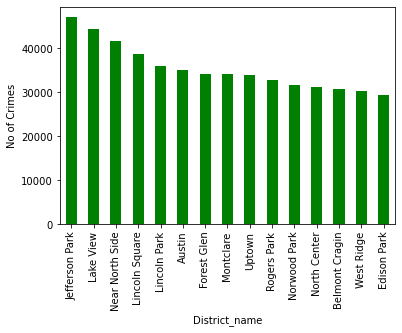

In [5]:
#Graphic describing the total of crimes per district from 2019 to 2021
temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

In [6]:
#Total of crime in 2019 per district 
grouped_district_df = crimes_data.loc[crimes_data['Year']==2019].groupby(["District_name"])

totalpopulation = grouped_district_df["District_population"].first()

totalcrimes2019 = grouped_district_df["ID"].count()

district_summary_df = pd.DataFrame({"District Population": totalpopulation,
                                   "Total Crimes 2019":totalcrimes2019})
                                   
district_summary_df[["District Population", 
                     "Total Crimes 2019"]]


,District Population,Total Crimes 2019
District_name,,
Albany Park,48396,9280
Austin,96557,12940
Belmont Cragin,78116,11827
Dunning,43147,6751
Edison Park,11525,10997
Forest Glen,19596,13172
Hermosa,24062,4376
Irving Park,51940,8308
Jefferson Park,26216,18684


In [7]:
#Total of crime in 2020 per district 
grouped_district_df = crimes_data.loc[crimes_data['Year']==2020].groupby(["District_name"])

totalpopulation = grouped_district_df["District_population"].first()

totalcrimes2020 = grouped_district_df["ID"].count()

district_summary_df = pd.DataFrame({"District Population": totalpopulation,
                                   "Total Crimes 2020":totalcrimes2020})
                                   
district_summary_df[["District Population", 
                     "Total Crimes 2020"]]

,District Population,Total Crimes 2020
District_name,,
Albany Park,48396,6658
Austin,96557,11292
Belmont Cragin,78116,9407
Dunning,43147,6015
Edison Park,11525,9265
Forest Glen,19596,10162
Hermosa,24062,4089
Irving Park,51940,7553
Jefferson Park,26216,15030


In [8]:
#Total of crime in 2021 per district 
grouped_district_df = crimes_data.loc[crimes_data['Year']==2021].groupby(["District_name"])

totalpopulation = grouped_district_df["District_population"].first()

totalcrimes2021 = grouped_district_df["ID"].count()



district_summary_df = pd.DataFrame({"District Population": totalpopulation,
                                   "Total Crimes 2021":totalcrimes2021})
                                   
district_summary_df[["District Population", 
                     "Total Crimes 2021"]]

,District Population,Total Crimes 2021
District_name,,
Albany Park,48396,6815
Austin,96557,10768
Belmont Cragin,78116,9619
Dunning,43147,5701
Edison Park,11525,9077
Forest Glen,19596,10825
Hermosa,24062,4205
Irving Park,51940,7766
Jefferson Park,26216,13351


In [ ]:
#Merged the total of crimes per year per district 


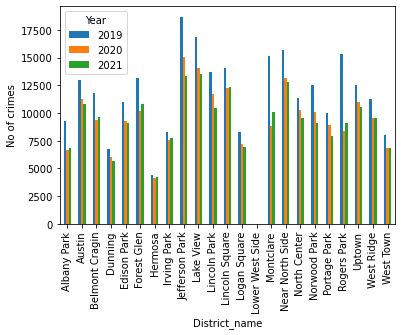

In [12]:
#Graphic describing the crimes per district by year 
crimes_data.groupby(['District_name','Year'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of crimes')
plt.show()